**6430250440 นายอิทธิเดช กระจ่าง**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/driver-data.csv")
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
X = data[['mean_dist_day','mean_over_speed_perc']].copy()
X.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

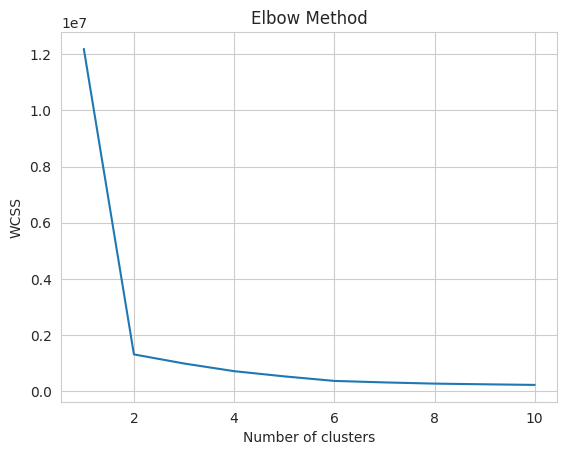

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

      mean_dist_day  mean_over_speed_perc
0             71.24                    28
1             52.53                    25
2             64.54                    27
3             55.69                    22
4             54.58                    25
...             ...                   ...
3995         160.04                    10
3996         176.17                     5
3997         170.91                    12
3998         176.14                     5
3999         168.03                     9

[4000 rows x 2 columns]


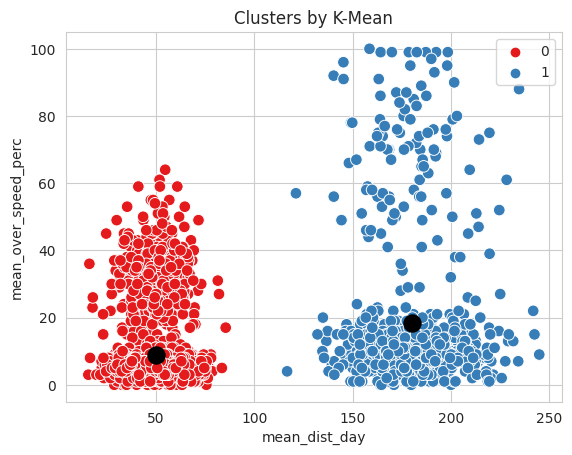

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_2y = kmeans.fit_predict(X)
print(X)

sns.set_style('whitegrid')
sns.scatterplot(data=X, x='mean_dist_day',y='mean_over_speed_perc', hue=pred_2y, palette='Set1', s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black')
plt.title('Clusters by K-Mean')
plt.show()

      mean_dist_day  mean_over_speed_perc
0             71.24                    28
1             52.53                    25
2             64.54                    27
3             55.69                    22
4             54.58                    25
...             ...                   ...
3995         160.04                    10
3996         176.17                     5
3997         170.91                    12
3998         176.14                     5
3999         168.03                     9

[4000 rows x 2 columns]


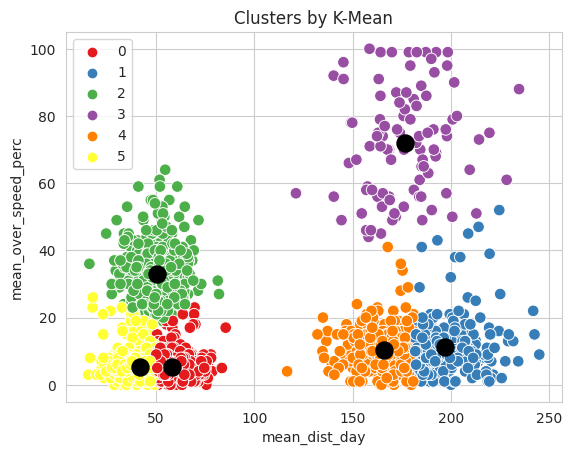

In [ ]:
kmeans = KMeans(n_clusters =6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_6y = kmeans.fit_predict(X)
print(X)

sns.set_style('whitegrid')
sns.scatterplot(data=X, x='mean_dist_day',y='mean_over_speed_perc', hue=pred_6y, palette='Set1', s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black')
plt.title('Clusters by K-Mean')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X,pred_2y)
print("Silhouette Score(K = 2):", silhouette_avg)

Silhouette Score(K = 2): 0.8490223286225532


In [ ]:
silhouette_avg = silhouette_score(X,pred_6y)
print("Silhouette Score(K = 6):", silhouette_avg)

Silhouette Score(K = 6): 0.48551213669411253


**k = 2 ดึสุด**